In [1]:
#En esta programa vamos a leer datos desde un archivo. Este tipo de procedimiento es explicado con mayor detalle en la Act.3 
#de física computancional.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# df va a ser mi Dataframe, es decir que lo que lea se lo asignar a una tabla de datos, es decir, en un arreglo de dos
#dimensiones (una matriz).

#pd.read_cvs: dentro de la biblioteca pandas, busca el comando de READ archivo csv (acrónimo para "archivo separado por comas").

#Como nuestro archivo tiene varios valores separados de manera no equitativa (hay un espacio entre datos, pero 3 espacios entre
#otros), vamos a usar el comando

        #DELIM_WHITESPACE= TRUE

#que nos ayude con esa inequitatividad al momento de leer los valores. 

df = pd.read_csv("3004.txt", delim_whitespace=True, skiprows=20, skipfooter=1, header= None, engine= 'python')
df.columns = [ 'Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']

df.head()

,Fecha,Precip,Evap,Tmax,Tmin
0,09/09/1940,0,Nulo,39,Nulo
1,10/09/1940,0,Nulo,40,21
2,11/09/1940,0,Nulo,41,22
3,12/09/1940,0,Nulo,40,26
4,13/09/1940,0,Nulo,39,26


In [3]:
#Al leer los archivos, estos se leyeron como Objecto, pero los necesito como punto flotante, así que uso la función

col= ['Precip', 'Evap', 'Tmax', 'Tmin']

df[col]= df[col].apply(pd.to_numeric, errors='coerce', axis=1)

#Ahora queremos leer la fecha como una fecha, no como objeto.

#Coerce sirve para que lo que no tenga formato de fecha, simplemente no lo tome en cuenta, en lugar de marcar error al comando.
df['Ndate'] = pd.to_datetime(df['Fecha'], dayfirst=True, format='%d/%m/%Y', errors='coerce')

In [4]:
df.dtypes

Fecha             object
Precip           float64
Evap             float64
Tmax             float64
Tmin             float64
Ndate     datetime64[ns]
dtype: object

In [5]:
df.head()

,Fecha,Precip,Evap,Tmax,Tmin,Ndate
0,09/09/1940,0.0,NaN,39.0,NaN,1940-09-09
1,10/09/1940,0.0,NaN,40.0,21.0,1940-09-10
2,11/09/1940,0.0,NaN,41.0,22.0,1940-09-11
3,12/09/1940,0.0,NaN,40.0,26.0,1940-09-12
4,13/09/1940,0.0,NaN,39.0,26.0,1940-09-13


In [6]:
 #Vamos a filtrar los años de 1980 a 2010 de nuestra variable (Dataframe), ya que 30 años de datos de clima te da la Normal 
#Climatoógica de la ciudad, estado o región a la que se lo sacas.
    
import datetime  

df2= df[(df['Ndate'] >= '1980-02-01') & (df['Ndate'] <= '2010-12-31')]

In [7]:
df2.dtypes

Fecha             object
Precip           float64
Evap             float64
Tmax             float64
Tmin             float64
Ndate     datetime64[ns]
dtype: object

In [8]:
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

print (__version__)

#Con esto vamos a hacer que se aparezcan las gráficas que crearemos.
init_notebook_mode(connected=True)

3.2.1rc1


C:\Users\Itzel\Documents\Anaconda\lib\site-packages\plotly\graph_objs\_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


C:\Users\Itzel\Documents\Anaconda\lib\site-packages\plotly\graph_objs\_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




In [9]:
#Necesito un dato de referencia para mis gráficas, así que voy a sacar el promedio de la temperatura máxima, y hacer una línea
#definiéndola en mis siguientes gráficas.
df2.Tmax.mean()

30.358313959365205

In [10]:
import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Histogram(x=df2['Tmax'],
        nbinsx = 40,
        marker=dict(color='#EB89B5'),
        opacity= 0.75)                      


data = [trace1]
layout = go.Layout(
    title='Fig1:Distribución de Tmax Buena Vista San Loreto[3004] (1980-2010)',
    xaxis=dict(
        title='Tmax',
        titlefont=dict(
            family='Calibri Light, monospace',
            size=22,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Frecuencia',
        titlefont=dict(
            family='Calibri Light, monospace',
            size=22,
            color='#7f7f7f'
        )
    ),
    #El promedio de la Temperatura máxima como referencia:
    shapes= [
        # Line Vertical
        {
            'type': 'line',
            'x0': 30.358313959365205,
            'y0': 0,
            'x1': 30.358313959365205,
            'y1': 950,
            'line': {
                'color': 'rgb(55, 128, 191)',
                'width': 3,
                'dash': 'dashdot',
            }
        }
    ],
    showlegend=False,
    annotations=[
        dict(
            x=30.358313959365205,
            y=950,
            xref='x',
            yref='y',
            text='Tmax Promedio=30.3°C',
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        )
    ]
)


#fig = go.Figure(data=data, layout=layout)

fig = go.Figure({
    'data': data,
    'layout': layout,
})

iplot({'data': data, 'layout': layout}, filename='timestamp-highlight')

In [11]:
#Vamos a poner una etiqueta extra a cada dato, dependiendo de su mes, para poder crear un Boxplot para cada mes.

df2['month'] = pd.DatetimeIndex(df2['Ndate']).month

df2.head()

C:\Users\Itzel\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Fecha,Precip,Evap,Tmax,Tmin,Ndate,month
13576,01/02/1980,0.0,3.8,30.0,10.0,1980-02-01,2
13577,02/02/1980,0.0,3.7,30.0,11.0,1980-02-02,2
13578,03/02/1980,0.0,5.2,32.0,12.0,1980-02-03,2
13579,04/02/1980,0.0,5.2,34.0,10.0,1980-02-04,2
13580,05/02/1980,0.0,2.7,33.0,7.0,1980-02-05,2


In [12]:
#Ahora necesitamos crear Boxplots de cada mes.
#Vamos a crear 12 variables, cada una va a tener los datos de un mes correspondiente.

y1 = df2.loc[df2['month'] == 1]
y2 = df2.loc[df2['month'] == 2]
y3 = df2.loc[df2['month'] == 3]
y4 = df2.loc[df2['month'] == 4]
y5 = df2.loc[df2['month'] == 5]
y6 = df2.loc[df2['month'] == 6]
y7 = df2.loc[df2['month'] == 7]
y8 = df2.loc[df2['month'] == 8]
y9 = df2.loc[df2['month'] == 9]
y10 = df2.loc[df2['month'] == 10]
y11 = df2.loc[df2['month'] == 11]
y12 = df2.loc[df2['month'] == 12] 


In [13]:
#Vamos a crear los Boxplots

trace1 = go.Box(y=y1['Tmax'],
    name = 'Enero',
    marker = dict(
    color = 'rgb(5, 28, 0.5)',)
    )

trace2 = go.Box(y=y2['Tmax'],
    name = 'Febrero',
    marker = dict(
    color = 'rgb(2,234,234)',)
    )

trace3 = go.Box(y=y3['Tmax'],
    name = 'Marzo',
    marker = dict(
    color = 'rgb(9,56,125)',)
    )

trace4 = go.Box(y=y4['Tmax'],
    name = 'Abril',
    marker = dict(
    color = 'rgb(107,174,214)',)
    )

trace5 = go.Box(y=y5['Tmax'],
    name = 'Mayo',
    marker = dict(
    color = 'rgba(127, 96, 0, 0.5)',)
    )

trace6 = go.Box(y=y6['Tmax'],
    name = 'Junio',
    marker = dict(
    color = 'rgba(207, 114, 255, 0.5)',)
    )

trace7 = go.Box(y=y7['Tmax'],
    name = 'Julio',
    marker = dict(
    color = 'rgb(0, 128, 128)',)
    )

trace8 = go.Box(y=y8['Tmax'],
    name = 'Agosto',
    marker = dict(
    color = 'rgba(44, 160, 101, 0.5)',)
    )

trace9 = go.Box(y=y9['Tmax'],
    name = 'Septiembre',
    marker = dict(
    color = 'rgba(255, 65, 54, 0.5)',)
    )

trace10 = go.Box(y=y10['Tmax'],
    name = 'Octubre',
    marker = dict(
    color = 'rgba(255, 144, 14, 0.5)',)
    )

trace11 = go.Box(y=y11['Tmax'],
    name = 'Noviembre',
    marker = dict(
    color = 'rgb(10, 140, 208)',)
    )

trace12 = go.Box(y=y12['Tmax'],
    name = 'Diciembre',
    marker = dict(
    color = 'rgb(214, 12, 140)',)
    )


data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12]

layout = go.Layout(
    title='Fig2: Variabilidad Mensual de Tmax Buena Vista San Loreto[3004] (1980-2010)',
    xaxis=dict(
        title='Mes',
        titlefont=dict(
            family='Calibri Light, monospace',
            size=22,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Tmax',
        titlefont=dict(
            family='Calibri Light, monospace',
            size=22,
            color='#7f7f7f'
        )
    ),
    #El promedio de la Temperatura máxima como referencia:
    shapes = [
        {
            'type': 'line',
            'x0': -0.5,
            'y0': 30.358313959365205,
            'x1': 12,
            'y1': 30.358313959365205,
            'line': {
                'color': 'rgb(50, 171, 96)',
                'width': 4,
                'dash': 'dashdot',
            },
        }
    ],
    showlegend=False,
    annotations=[
        dict(
            x=12,
            y=30.358313959365205,
            xref='x',
            yref='y',
            text='Tmax Promedio=30.3°C',
            showarrow=True,
            arrowhead=7,
            ax=25,
            ay=-40
        )
    ]
)

fig = go.Figure({
    'data': data,
    'layout': layout,
})

iplot({'data': data, 'layout': layout}, filename='timestamp-highlight')

In [14]:
#Ahora vamos a usar los datos del 2011-2016 para comparar con la Normal Climatológica y observar si la temperatura ha aumentado

df3= df[(df['Ndate'] >= '2011-01-01') & (df['Ndate'] <= '2016-12-31')]

df3.Tmax.mean()

31.441130152848537

In [15]:
#Histograma 2011-2016

trace1 = go.Histogram(x=df3['Tmax'],
        nbinsx = 40,
        marker=dict(color='#df89eb'),
        opacity= 0.75)                      


data = [trace1]
layout = go.Layout(
    title='Fig1:Distribución de Tmax Buena Vista San Loreto[3004] (2011-2016)',
    xaxis=dict(
        title='Tmax',
        titlefont=dict(
            family='Calibri Light, monospace',
            size=22,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Frecuencia',
        titlefont=dict(
            family='Calibri Light, monospace',
            size=22,
            color='#7f7f7f'
        )
    ),
    #El promedio de la Temperatura máxima como referencia:
    shapes= [
        # Line Vertical
        {
            'type': 'line',
            'x0': 31.441130152848537,
            'y0': 0,
            'x1': 31.441130152848537,
            'y1': 180,
            'line': {
                'color': 'rgb(55, 128, 191)',
                'width': 3,
                'dash': 'dashdot',
            }
        }
    ],
    showlegend=False,
    annotations=[
        dict(
            x=31.441130152848537,
            y=180,
            xref='x',
            yref='y',
            text='Tmax Promedio=31.4°C',
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        )
    ]
)


#fig = go.Figure(data=data, layout=layout)

fig = go.Figure({
    'data': data,
    'layout': layout,
})

iplot({'data': data, 'layout': layout}, filename='timestamp-highlight')

In [16]:
df3['month'] = pd.DatetimeIndex(df3['Ndate']).month


df3.head()

C:\Users\Itzel\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Fecha,Precip,Evap,Tmax,Tmin,Ndate,month
23520,01/01/2011,0.0,NaN,26.0,3.0,2011-01-01,1
23521,02/01/2011,0.0,NaN,26.0,2.0,2011-01-02,1
23522,03/01/2011,0.0,NaN,25.0,1.0,2011-01-03,1
23523,04/01/2011,0.0,NaN,28.0,1.0,2011-01-04,1
23524,05/01/2011,0.0,NaN,23.0,4.0,2011-01-05,1


In [17]:
#Vamos a crear 12 variables, cada una va a tener los datos de un mes correspondiente.

z1 = df3.loc[df3['month'] == 1]
z2 = df3.loc[df3['month'] == 2]
z3 = df3.loc[df3['month'] == 3]
z4 = df3.loc[df3['month'] == 4]
z5 = df3.loc[df3['month'] == 5]
z6 = df3.loc[df3['month'] == 6]
z7 = df3.loc[df3['month'] == 7]
z8 = df3.loc[df3['month'] == 8]
z9 = df3.loc[df3['month'] == 9]
z10 = df3.loc[df3['month'] == 10]
z11 = df3.loc[df3['month'] == 11]
z12 = df3.loc[df3['month'] == 12] 


In [18]:
#Vamos a crear los Boxplots

trace1 = go.Box(y=z1['Tmax'],
    name = 'Enero',
    marker = dict(
    color = 'rgb(5, 28, 0.5)',)
    )

trace2 = go.Box(y=z2['Tmax'],
    name = 'Febrero',
    marker = dict(
    color = 'rgb(2,234,234)',)
    )

trace3 = go.Box(y=z3['Tmax'],
    name = 'Marzo',
    marker = dict(
    color = 'rgb(9,56,125)',)
    )

trace4 = go.Box(y=z4['Tmax'],
    name = 'Abril',
    marker = dict(
    color = 'rgb(107,174,214)',)
    )

trace5 = go.Box(y=z5['Tmax'],
    name = 'Mayo',
    marker = dict(
    color = 'rgba(127, 96, 0, 0.5)',)
    )

trace6 = go.Box(y=z6['Tmax'],
    name = 'Junio',
    marker = dict(
    color = 'rgba(207, 114, 255, 0.5)',)
    )

trace7 = go.Box(y=z7['Tmax'],
    name = 'Julio',
    marker = dict(
    color = 'rgb(0, 128, 128)',)
    )

trace8 = go.Box(y=z8['Tmax'],
    name = 'Agosto',
    marker = dict(
    color = 'rgba(44, 160, 101, 0.5)',)
    )

trace9 = go.Box(y=z9['Tmax'],
    name = 'Septiembre',
    marker = dict(
    color = 'rgba(255, 65, 54, 0.5)',)
    )

trace10 = go.Box(y=z10['Tmax'],
    name = 'Octubre',
    marker = dict(
    color = 'rgba(255, 144, 14, 0.5)',)
    )

trace11 = go.Box(y=z11['Tmax'],
    name = 'Noviembre',
    marker = dict(
    color = 'rgb(10, 140, 208)',)
    )

trace12 = go.Box(y=z12['Tmax'],
    name = 'Diciembre',
    marker = dict(
    color = 'rgb(214, 12, 140)',)
    )


data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12]

layout = go.Layout(
    title='Fig4: Variabilidad Mensual de Tmax Buena Vista San Loreto[3004] (2011-2016)',
    xaxis=dict(
        title='Mes',
        titlefont=dict(
            family='Calibri Light, monospace',
            size=22,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Tmax',
        titlefont=dict(
            family='Calibri Light, monospace',
            size=22,
            color='#7f7f7f'
        )
    ),
    #El promedio de la Temperatura máxima como referencia:
    shapes = [
        {
            'type': 'line',
            'x0': -0.5,
            'y0': 31.441130152848537,
            'x1': 12,
            'y1': 31.441130152848537,
            'line': {
                'color': 'rgb(50, 171, 96)',
                'width': 4,
                'dash': 'dashdot',
            },
        }
    ],
    showlegend=False,
    annotations=[
        dict(
            x=12,
            y=31.441130152848537,
            xref='x',
            yref='y',
            text='Tmax Promedio=31.4°C',
            showarrow=True,
            arrowhead=7,
            ax=25,
            ay=-40
        )
    ]
)

fig = go.Figure({
    'data': data,
    'layout': layout,
})

iplot({'data': data, 'layout': layout}, filename='timestamp-highlight')

In [19]:
#Ahora vamos a juntar ambos Histogramas y Boxplots para observar cómo ha cambiado la temperatura los últimos 5 años (2011-2016)

# Como el número de datos de 1981-2010, es mayor al número de datos de 2011-2017, 
# normalizamos (es decir la suma de áreas es iguañ a 1)

trace1 = go.Histogram(x=df2['Tmax'],
        nbinsx = 40,
        marker=dict(color='#EB89B5'),
        opacity= 0.75,
        histnorm='probability',
        name='1980-2010')                      

trace2 = go.Histogram(x=df3['Tmax'],
        nbinsx = 40,
        marker=dict(color='#df89eb'),
        opacity= 0.75,
        histnorm='probability',
        name= '2011-2016')   


data = [trace1, trace2]
layout = go.Layout(
    title='Fig5:Distribución de Tmax Buena Vista San Loreto[3004] (Normalizada)',
    xaxis=dict(
        title='Tmax',
        titlefont=dict(
            family='Calibri Light, monospace',
            size=22,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Frecuencia (Normalizada)',
        titlefont=dict(
            family='Calibri Light, monospace',
            size=22,
            color='#7f7f7f'
        )
    ),
    barmode='overlay',
)


#fig = go.Figure(data=data, layout=layout)

fig = go.Figure({
    'data': data,
    'layout': layout,
})

iplot({'data': data, 'layout': layout}, filename='timestamp-highlight2')

In [20]:
#Ahora lo queremos en porcentaje

trace1 = go.Histogram(x=df2['Tmax'],
        nbinsx = 40,
        marker=dict(color='#EB89B5'),
        opacity= 0.75,
        histnorm='percent',
        name= '1980-2010')                      

trace2 = go.Histogram(x=df3['Tmax'],
        nbinsx = 40,
        marker=dict(color='#df89eb'),
        opacity= 0.75,
        histnorm='percent',
        name= '2011-2016')   


data = [trace1, trace2]
layout = go.Layout(
    title='Fig6:Distribución de Tmax Buena Vista San Loreto[3004] (Normalizada en %)',
    xaxis=dict(
        title='Tmax',
        titlefont=dict(
            family='Calibri Light, monospace',
            size=22,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Frecuencia (Normalizada)',
        titlefont=dict(
            family='Calibri Light, monospace',
            size=22,
            color='#7f7f7f'
        )
    ),
    barmode='overlay',
)


#fig = go.Figure(data=data, layout=layout)

fig = go.Figure({
    'data': data,
    'layout': layout,
})

iplot({'data': data, 'layout': layout}, filename='timestamp-highlight2')

In [21]:
trace1 = go.Box(y=df2['Tmax'],
    name = '1980-2010',
    marker = dict(
    color = 'rgb(10, 140, 208)',)
    )

trace2 = go.Box(y=df3['Tmax'],
    name = '2011-2016',
    marker = dict(
    color = 'rgb(214, 12, 140)',)
    )


data = [trace1, trace2]

layout = go.Layout(
    title='Fig7: Variabilidad de Tmax Respecto a la Normal Climatológica base Buena Vista San Loreto[3004] (1980-2010)',
    xaxis=dict(
        title='Años',
        titlefont=dict(
            family='Calibri Light, monospace',
            size=22,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Tmax',
        titlefont=dict(
            family='Calibri Light, monospace',
            size=22,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure({
    'data': data,
    'layout': layout,
})

iplot({'data': data, 'layout': layout}, filename='timestamp-highlight')

In [22]:
# Queremos hacer una gráfica con los números de días calientes por año. Para eso tenemos que separar mi variable por año,
# para poder escoger el número de días calientes en un DO de cada uno y poder graficarse. El día caliente se tomara como aquel
# día cuya temperatura máxima rebaso los 30 grados C.

# Primero vamos a usar ver cómo funciona el LOOP en Python. Se necesita utilizar la función RANGE, que nos dirá los valores a
# los que va a ir cambiando, y de cuánto en cuánto lo hará (en nuestro caso irá de 1 en 1).


for i in range(1980, 2011, 1):

    print(i)

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010


In [23]:
#Vamos a crear una nueva columna en la variable df2 que nos diga solamente el año.

df2['year'] = df2['Ndate'].dt.year

C:\Users\Itzel\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



df2.head() 

In [24]:
#Ahora vamos a elegir que tome los datos del año de 1980 de toda la variable df2.

df1980 = df2['year'] == 1980

# df1980.dtypes --> boolean type: dice si es true or false



#Ahora, vamos a elegir que tome los datos que sean mayores a 30 grados de todo df2.

hot1980 = df2['Tmax'] > 30


# Entonces, vamos a pedir que en una neuva variable, aparezcan todos los valores donde coincidan las dos variables anteriores.
# Es decir, que aparezcan los valores donde estén los datos de 1980 que tenían una temperatura mayor a 30 grados.

dfhot1980 = df2[df1980 & hot1980]

# dfhot1980.head(100)



# Como queremos saber cúantos números fueron los días en los que 1980 tuvo temperaturas mayores a 30, podemos usar dos 
# funciones para ver el número de columnas. Una es:

# vamos a guardar el número de días calientes en la variable:
d80 = len(dfhot1980.index)

#la otra es:
# dfhot1980.shape

In [25]:
#Ahora se va a reproducir en todos los años hasta 2010.

In [78]:
# Año:
df1981 = df2['year'] == 1981
df1982 = df2['year'] == 1982
df1983 = df2['year'] == 1983
df1984 = df2['year'] == 1984
df1985 = df2['year'] == 1985
df1986 = df2['year'] == 1986
df1987 = df2['year'] == 1987
df1988 = df2['year'] == 1988
df1989 = df2['year'] == 1989
df1990 = df2['year'] == 1990
df1991 = df2['year'] == 1991
df1992 = df2['year'] == 1992
df1993 = df2['year'] == 1993
df1994 = df2['year'] == 1994
df1995 = df2['year'] == 1995
df1996 = df2['year'] == 1996
df1997 = df2['year'] == 1997
df1998 = df2['year'] == 1998
df1999 = df2['year'] == 1999
df2000 = df2['year'] == 2000
df2001 = df2['year'] == 2001
df2002 = df2['year'] == 2002
df2003 = df2['year'] == 2003
df2004 = df2['year'] == 2004
df2005 = df2['year'] == 2005
df2006 = df2['year'] == 2006
df2007 = df2['year'] == 2007
df2008 = df2['year'] == 2008
df2009 = df2['year'] == 2009
df2010 = df2['year'] == 2010

#Temperatura:
hot1981 = df2['Tmax'] > 30
hot1982 = df2['Tmax'] > 30
hot1983 = df2['Tmax'] > 30
hot1984 = df2['Tmax'] > 30
hot1985 = df2['Tmax'] > 30
hot1986 = df2['Tmax'] > 30
hot1987 = df2['Tmax'] > 30
hot1988 = df2['Tmax'] > 30
hot1989 = df2['Tmax'] > 30
hot1990 = df2['Tmax'] > 30
hot1991 = df2['Tmax'] > 30
hot1992 = df2['Tmax'] > 30
hot1993 = df2['Tmax'] > 30
hot1994 = df2['Tmax'] > 30
hot1995 = df2['Tmax'] > 30
hot1996 = df2['Tmax'] > 30
hot1997 = df2['Tmax'] > 30
hot1998 = df2['Tmax'] > 30
hot1999 = df2['Tmax'] > 30
hot2000 = df2['Tmax'] > 30
hot2001 = df2['Tmax'] > 30
hot2002 = df2['Tmax'] > 30
hot2003 = df2['Tmax'] > 30
hot2004 = df2['Tmax'] > 30
hot2005 = df2['Tmax'] > 30
hot2006 = df2['Tmax'] > 30
hot2007 = df2['Tmax'] > 30
hot2008 = df2['Tmax'] > 30
hot2009 = df2['Tmax'] > 30
hot2010 = df2['Tmax'] > 30

#Combianción:
dfhot1981 = df2[df1981 & hot1981]
dfhot1982 = df2[df1982 & hot1982]
dfhot1983 = df2[df1983 & hot1983]
dfhot1984 = df2[df1984 & hot1984]
dfhot1985 = df2[df1985 & hot1985]
dfhot1986 = df2[df1986 & hot1986]
dfhot1987 = df2[df1987 & hot1987]
dfhot1988 = df2[df1988 & hot1988]
dfhot1989 = df2[df1989 & hot1989]
dfhot1990 = df2[df1990 & hot1990]
dfhot1991 = df2[df1991 & hot1991]
dfhot1992 = df2[df1992 & hot1992]
dfhot1993 = df2[df1993 & hot1993]
dfhot1994 = df2[df1994 & hot1994]
dfhot1995 = df2[df1995 & hot1995]
dfhot1996 = df2[df1996 & hot1996]
dfhot1997 = df2[df1997 & hot1997]
dfhot1998 = df2[df1998 & hot1998]
dfhot1999 = df2[df1999 & hot1999]
dfhot2000 = df2[df2000 & hot2000]
dfhot2001 = df2[df2001 & hot2001]
dfhot2002 = df2[df2002 & hot2002]
dfhot2003 = df2[df2003 & hot2003]
dfhot2004 = df2[df2004 & hot2004]
dfhot2005 = df2[df2005 & hot2005]
dfhot2006 = df2[df2006 & hot2006]
dfhot2007 = df2[df2007 & hot2007]
dfhot2008 = df2[df2008 & hot2008]
dfhot2009 = df2[df2009 & hot2009]
dfhot2010 = df2[df2010 & hot2010]

#número de días calientes:
d81 = len(dfhot1981.index)
d82 = len(dfhot1982.index)
d83 = len(dfhot1983.index)
d84 = len(dfhot1984.index)
d85 = len(dfhot1985.index)
d86 = len(dfhot1986.index)
d87 = len(dfhot1987.index)
d88 = len(dfhot1988.index)
d89 = len(dfhot1989.index)
d90 = len(dfhot1990.index)
d91 = len(dfhot1991.index)
d92 = len(dfhot1992.index)
d93 = len(dfhot1993.index)
d94 = len(dfhot1994.index)
d95 = len(dfhot1995.index)
d96 = len(dfhot1996.index)
d97 = len(dfhot1997.index)
d98 = len(dfhot1998.index)
d99 = len(dfhot1999.index)
d00 = len(dfhot2000.index)
d01 = len(dfhot2001.index)
d02 = len(dfhot2002.index)
d03 = len(dfhot2003.index)
d04 = len(dfhot2004.index)
d05 = len(dfhot2005.index)
d06 = len(dfhot2006.index)
d07 = len(dfhot2007.index)
d08 = len(dfhot2008.index)
d09 = len(dfhot2009.index)
d10 = len(dfhot2010.index)

In [70]:
# Vamos a hacer el arreglo que tenga año y número de días calientes.

# Creamos una arreglo vacío:
df_HotYears = pd.DataFrame({'Year' : []})

#df_HotClima.head()


In [71]:
list1 = range(1980, 2011, 1)

# Vamos a crear una columna que tenga los años desde 1980 hasta 2010
df_HotYears = pd.DataFrame({'Year' : list1})


df_HotYears.head()

#df_HotClima.head(31)

,Year
0,1980
1,1981
2,1982
3,1983
4,1984


In [29]:
# Ahora vamos a agregrarle a la columa que acabamos de crear otra fila, esta con los números de días calientes que le
# corresponden a cada año.

HotList =  [d80, d81, d82, d83, d84, d85, d86, d87, d88, d89, d90, d91, d92, d93, d94, d95, d96, d97, d98, d99, 
            d00, d01, d02, d03, d04, d05, d06, d07, d08, d09, d10]

df_HotDays = pd.DataFrame(HotList, columns = ['HotDays'])

In [30]:
df_HotClima = pd.concat([df_HotYears, df_HotDays], axis = 1)

In [31]:
#df_HotClima.sort_values(by=['Year', 'HotDays'])

In [33]:
from ggplot import *
dfTemp = df_HotClima.sort_values(by=['Year', 'HotDays'])

dfTemp.describe()

C:\Users\Itzel\Documents\Anaconda\lib\site-packages\ggplot\utils.py:81: FutureWarning:

pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp

C:\Users\Itzel\Documents\Anaconda\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning:

The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead



,Year,HotDays
count,31.000000,31.000000
mean,1995.000000,149.548387
std,9.092121,37.579994
min,1980.000000,37.000000
25%,1987.500000,136.500000
50%,1995.000000,153.000000
75%,2002.500000,162.500000
max,2010.000000,219.000000


In [34]:
import statsmodels.api as sm
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

In [35]:
lowess = sm.nonparametric.lowess

x = df_HotClima['Year']
y = df_HotClima['HotDays']

ys = lowess(y, x)

#print(ys)

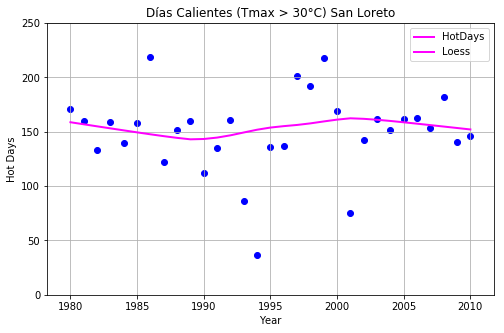

In [99]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, ylabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties

figure(1, figsize=(8, 5))


xlabel('Year')
ylabel('Hot Days')
grid(True)
lw = 1

plot(x,ys,'magenta',linewidth=2)
plt.scatter(x,y,color='blue')


plt.ylim([0,250])
legend(('HotDays', 'Loess'))
title('Días Calientes (Tmax > 30°C) San Loreto')

savefig('Ejemplo2.1_pt1.png', dpi=100)